In [394]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

In [395]:
#Extracting the SS coverages previously saved and extracted from kMC files
ss_COVG_NONLAT = pd.read_csv('SS_Covg_nonLat.csv')
ss_COVG_LAT = pd.read_csv('SS_Covg_Lat.csv')

In [396]:
#Isolating pressures and ss coverages
Prs_non_lat = ss_COVG_NONLAT.iloc[:,0].to_numpy()
Prs_lat = ss_COVG_LAT.iloc[:,0].to_numpy()
ss_covg_non_lat = ss_COVG_NONLAT.iloc[:,1].to_numpy()
ss_covg_lat = ss_COVG_LAT.iloc[:,1].to_numpy()

In [397]:
#Simulation times from each kMC simulation
t0,tf = 0,750.000000000102

In [398]:
%%time
#Performing SS MIKI MKM simulations for non lateral case
from main import *
MKM = MKModel('Atomic.csv','Stoich.csv','Param.csv')
MKM.Thermo_Constraint = 'OFF'
MKM.set_limits_of_integration(t0,tf)
MKM.rate_const_correction='None'
MKM_SS_covg_NONLAT = []
Prs = Prs_non_lat
for i in np.arange(len(Prs)):
    MKM.set_rxnconditions(Pr=[Prs[i]])
    MKM_SS_covg_NONLAT = np.append(MKM_SS_covg_NONLAT,MKM.get_SS_coverages(print_warning=False)[0])

Mass is conserved. 

CPU times: user 2.88 s, sys: 134 ms, total: 3.01 s
Wall time: 3.3 s


<IPython.core.display.Javascript object>


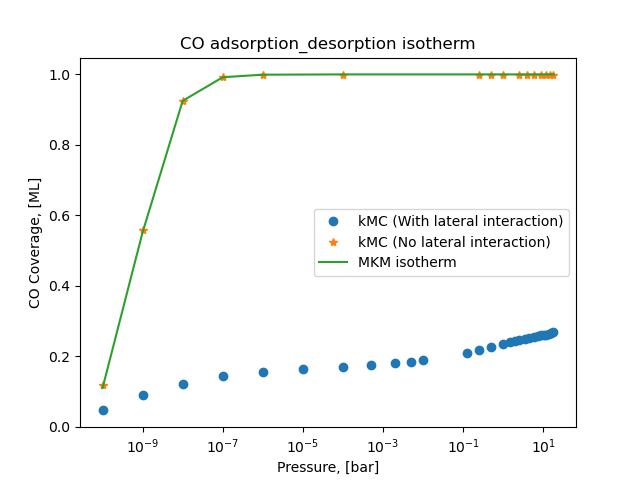

In [399]:
plt.figure()
plt.semilogx(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

In [400]:
Y_FIT = 1/ ( 2.3*np.exp(-4.43*Prs_lat + (1.1e-9/Prs_lat)) + 4)

In [401]:
# y_sr_fit = np.array([ 4.85792672e+08,  9.99406080e+07,  1.29658210e+07,  7.82519500e+05,
#         9.10060375e+05,  6.95730312e+05,  5.19318125e+05,  4.11955094e+05,
#         3.26331906e+05,  2.56997156e+05,  1.92406922e+05, -6.20910205e+03,
#        -6.03781641e+04, -1.01757836e+05, -1.38412891e+05, -1.56698266e+05,
#        -1.64443547e+05, -1.72300891e+05, -1.84961453e+05, -1.92594562e+05,
#        -1.96033578e+05, -2.05232922e+05, -2.06481109e+05, -2.09918297e+05,
#        -2.10703031e+05, -2.15721359e+05, -2.19057078e+05, -2.22179750e+05])

In [402]:
# x_sr = np.array([[0.04632962],
#        [0.09111097],
#        [0.12199639],
#        [0.14321615],
#        [0.15542546],
#        [0.16332516],
#        [0.17038888],
#        [0.17540673],
#        [0.18001615],
#        [0.18429133],
#        [0.18885611],
#        [0.20898624],
#        [0.21740851],
#        [0.22547927],
#        [0.23441984],
#        [0.2397746 ],
#        [0.24227528],
#        [0.24497761],
#        [0.24973696],
#        [0.25288743],
#        [0.25438593],
#        [0.25866748],
#        [0.25928191],
#        [0.26101916],
#        [0.2614255 ],
#        [0.2641146 ],
#        [0.26599499],
#        [0.26782851]])

Keq = MKM.k[0]/MKM.k[1]

In [403]:
Keq

1232142857.1428573

<IPython.core.display.Javascript object>


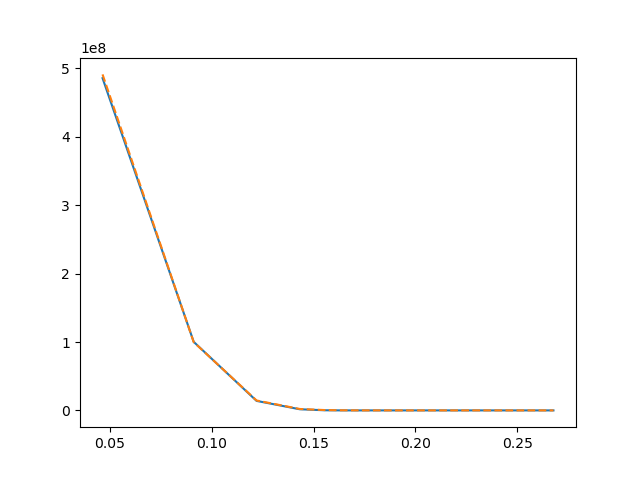

In [404]:

x_a = np.array([[0.04632962],
       [0.09111097],
       [0.12199639],
       [0.14321615],
       [0.15542546],
       [0.16332516],
       [0.17038888],
       [0.17540673],
       [0.18001615],
       [0.18429133],
       [0.18885611],
       [0.20898624],
       [0.21740851],
       [0.22547927],
       [0.23441984],
       [0.2397746 ],
       [0.24227528],
       [0.24497761],
       [0.24973696],
       [0.25288743],
       [0.25438593],
       [0.25866748],
       [0.25928191],
       [0.26101916],
       [0.2614255 ],
       [0.2641146 ],
       [0.26599499],
       [0.26782851]])
y_a = np.array([4.85803232e+08, 1.00244329e+08, 1.38947485e+07, 1.67155517e+06,
       1.84028110e+05, 1.95207442e+04, 2.05384042e+03, 4.25438192e+02,
       1.09768104e+02, 4.51855752e+01, 2.32826895e+01, 2.11360411e+00,
       1.11122350e+00, 5.82242045e-01, 3.06198955e-01, 2.10266234e-01,
       1.59870247e-01, 1.29785612e-01, 9.51045326e-02, 7.52191971e-02,
       5.68627351e-02, 4.65229788e-02, 3.88934753e-02, 3.36395296e-02,
       2.94966297e-02, 2.56362312e-02, 2.26492824e-02, 2.03222359e-02])

y_fit_a = np.array([4.91312960e+08, 9.98191760e+07, 1.44982440e+07, 2.07875688e+06,
       4.99935094e+05, 1.71929094e+05, 5.93001562e+04, 2.59726895e+04,
       1.15153574e+04, 5.14997168e+03, 2.06022339e+03, 1.61556015e+01,
       1.34409297e+00, 9.17922705e-02, 3.18306684e-03, 3.41980602e-04,
       1.13583177e-04, 3.29826071e-05, 3.31253864e-06, 6.61978447e-07,
       2.99873022e-07, 2.83452906e-08, 1.99628118e-08, 7.28406135e-09,
       5.73294123e-09, 1.13401055e-09, 3.51628560e-10, 1.08851345e-10])
plt.figure()
plt.plot(x_a,y_a)
plt.plot(x_a,y_fit_a ,'--')
plt.show()

In [520]:
Ki_lateral = []
for i in np.arange(len(Prs_lat)):
    Ki_lateral.append(ss_covg_lat[i]/((1-ss_covg_lat[i]) * Prs_lat[i]))
    
##Step 2: Calculating fi(theta)
Keq = MKM.k[0]/MKM.k[1]
fi_theta = []
for i in np.arange(len(Prs_lat)):
    fi_theta.append(Ki_lateral[i]/Keq)
    
##Therefore need to train ML model (for lateral interactions considered) where x is theta and y is fi_theta
##Step 3: MLM model
print('For Lateral:\n')
print('Pressure, SS_coverage_CO, K_from_isoeqn, f(theta)')
print(np.array([Prs_lat,ss_covg_lat,Ki_lateral,fi_theta]).T)

For Lateral:

Pressure, SS_coverage_CO, K_from_isoeqn, f(theta)
[[1.00000000e-10 4.63296155e-02 4.85803232e+08 3.94275087e-01]
 [1.00000000e-09 9.11109711e-02 1.00244329e+08 8.13577165e-02]
 [1.00000000e-08 1.21996393e-01 1.38947485e+07 1.12768973e-02]
 [1.00000000e-07 1.43216148e-01 1.67155517e+06 1.35662448e-03]
 [1.00000000e-06 1.55425457e-01 1.84028110e+05 1.49356148e-04]
 [1.00000000e-05 1.63325156e-01 1.95207442e+04 1.58429228e-05]
 [1.00000000e-04 1.70388884e-01 2.05384042e+03 1.66688498e-06]
 [5.00000000e-04 1.75406734e-01 4.25438192e+02 3.45283170e-07]
 [2.00000000e-03 1.80016145e-01 1.09768104e+02 8.90871566e-08]
 [5.00000000e-03 1.84291328e-01 4.51855752e+01 3.66723509e-08]
 [1.00000000e-02 1.88856113e-01 2.32826895e+01 1.88960958e-08]
 [1.25000000e-01 2.08986241e-01 2.11360411e+00 1.71538884e-09]
 [2.50000000e-01 2.17408512e-01 1.11122350e+00 9.01862547e-10]
 [5.00000000e-01 2.25479268e-01 5.82242045e-01 4.72544269e-10]
 [1.00000000e+00 2.34419844e-01 3.06198955e-01 2.48509

In [521]:
##Step 4-> Getting predicted _f(theta)
# f_theta_pred = y_sr_fit
# f_theta_pred = np.exp(0.03483852*(MKM_SS_covg_LAT**3))
# f_theta_pred = np.exp(-MKM_SS_covg_LAT)-np.exp(MKM_SS_covg_LAT)

##Step 4-> Getting predicted _f(theta)


# Ki_lateral_pred = np.array([4.8968909e+08, 9.6604928e+07, 1.9058036e+07, 3.7597332e+06,
#        7.4171306e+05, 1.4632373e+05, 2.8866471e+04, 9.2827129e+03,
#        3.4935754e+03, 1.8312760e+03, 1.1234440e+03, 1.8937225e+02,
#        1.1617535e+02, 7.1270790e+01, 4.3722919e+01, 3.2853279e+01,
#        2.6822964e+01, 2.2918852e+01, 1.8079403e+01, 1.5144183e+01,
#        1.2364424e+01, 1.0564769e+01, 9.2905931e+00, 8.3339567e+00,
#        7.5852776e+00, 6.8042345e+00, 6.1929779e+00, 5.6995564e+00])

# Ki_lateral_pred = -(2.63*10**-10) * ss_covg_lat + 0.161 + (0.136 / (ss_covg_lat+1.36))

Ki_lateral_pred = (-8.71*10**-11) * ss_covg_lat - 0.00594*np.log(ss_covg_lat*np.log(2*ss_covg_lat + 1.1)) +0.23

##Step6-> Calculating predicted theta
ML_theta_pred = []
for i in np.arange(len(Prs_lat)):
    ML_theta_pred.append((Ki_lateral_pred[i]*Prs_lat[i])/(1+(Ki_lateral_pred[i]*Prs_lat[i])))

<IPython.core.display.Javascript object>


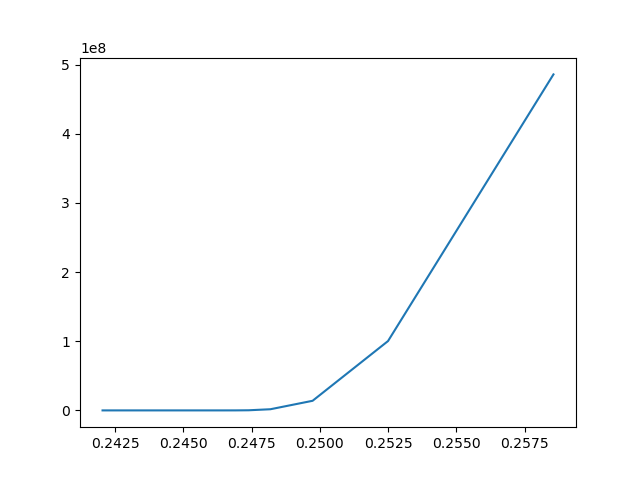

In [523]:
plt.figure()
plt.plot(Ki_lateral_pred,Ki_lateral)

In [512]:
ss_covg_lat

array([0.04632962, 0.09111097, 0.12199639, 0.14321615, 0.15542546,
       0.16332516, 0.17038888, 0.17540673, 0.18001615, 0.18429133,
       0.18885611, 0.20898624, 0.21740851, 0.22547927, 0.23441984,
       0.2397746 , 0.24227528, 0.24497761, 0.24973696, 0.25288743,
       0.25438593, 0.25866748, 0.25928191, 0.26101916, 0.2614255 ,
       0.2641146 , 0.26599499, 0.26782851])

In [513]:
ML_theta_pred

[2.585606602040306e-11,
 2.5249839986207545e-10,
 2.4973481832387992e-09,
 2.4818833274073314e-08,
 2.4739310076336315e-07,
 2.4690892303505136e-06,
 2.4648947250848044e-05,
 0.0001230904961580966,
 0.000491672066163199,
 0.0012271252935506926,
 0.002448850726180994,
 0.02965486079991192,
 0.05751502210393988,
 0.10863098466529773,
 0.19572480066678666,
 0.26723737788481805,
 0.3270794078421802,
 0.3778386639890126,
 0.4593291889577727,
 0.5219259402224712,
 0.5927151773737152,
 0.645121654446316,
 0.6856561026688383,
 0.7178388351298574,
 0.7440706473201977,
 0.7722337263466844,
 0.7948168652912986,
 0.8133173248192836]

In [514]:
len(Ki_lateral_pred)

28

In [515]:
# ML_theta_pred = Y_FIT

In [516]:
len(ML_theta_pred)

28

In [517]:
len(Prs_lat)

28

<IPython.core.display.Javascript object>


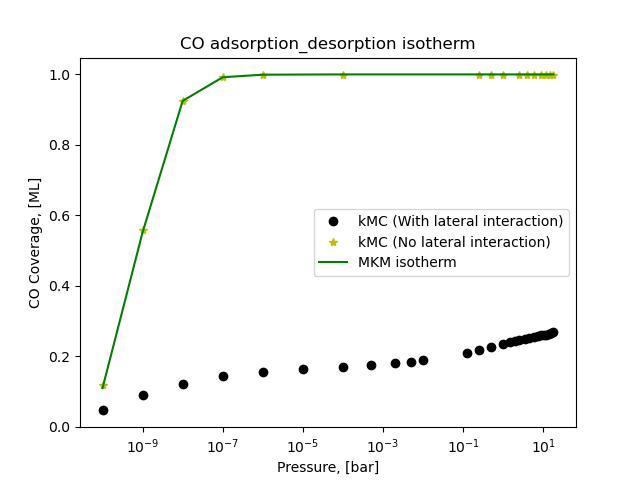

In [518]:
plt.figure()
# plt.semilogx(Prs_lat,ML_theta_pred,'-',label='ML lateral prediction (SR)')
plt.semilogx(Prs_lat,ss_covg_lat,'ko',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'y*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'g-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

<IPython.core.display.Javascript object>


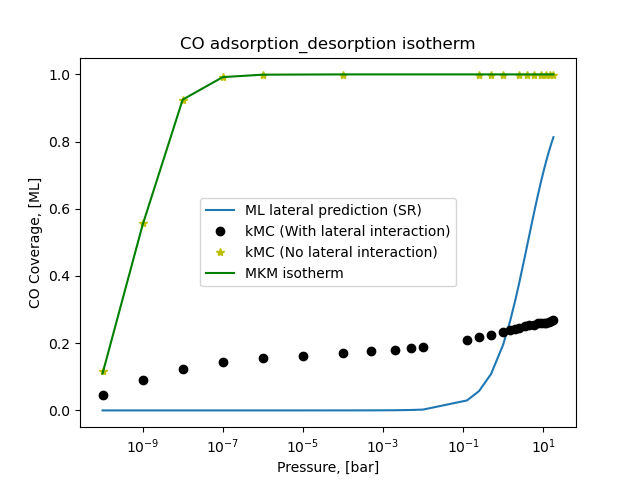

In [519]:
plt.figure()
plt.semilogx(Prs_lat,ML_theta_pred,'-',label='ML lateral prediction (SR)')
plt.semilogx(Prs_lat,ss_covg_lat,'ko',label='kMC (With lateral interaction)')
plt.semilogx(Prs_non_lat,ss_covg_non_lat,'y*',label='kMC (No lateral interaction)')
plt.semilogx(Prs_non_lat,MKM_SS_covg_NONLAT,'g-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

<IPython.core.display.Javascript object>


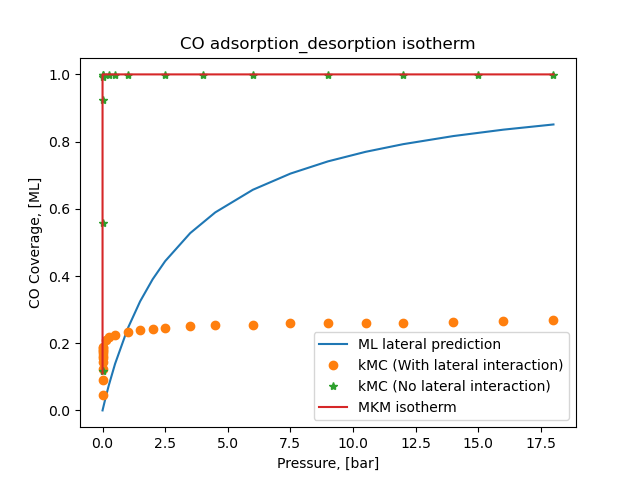

In [469]:
plt.figure()
plt.plot(Prs_lat,ML_theta_pred,'-',label='ML lateral prediction')
plt.plot(Prs_lat,ss_covg_lat,'o',label='kMC (With lateral interaction)')
plt.plot(Prs_non_lat,ss_covg_non_lat,'*',label='kMC (No lateral interaction)')
plt.plot(Prs_non_lat,MKM_SS_covg_NONLAT,'-',label='MKM isotherm')
# plt.semilogx(Prs,MKM_SS_covg_LAT,'-',label='MKM isotherm')
plt.legend()
plt.title('CO adsorption_desorption isotherm')
plt.xlabel('Pressure, [bar]')
plt.ylabel('CO Coverage, [ML]')
plt.show()

In [15]:
import glob, os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
%matplotlib notebook
from main import *

<IPython.core.display.Javascript object>


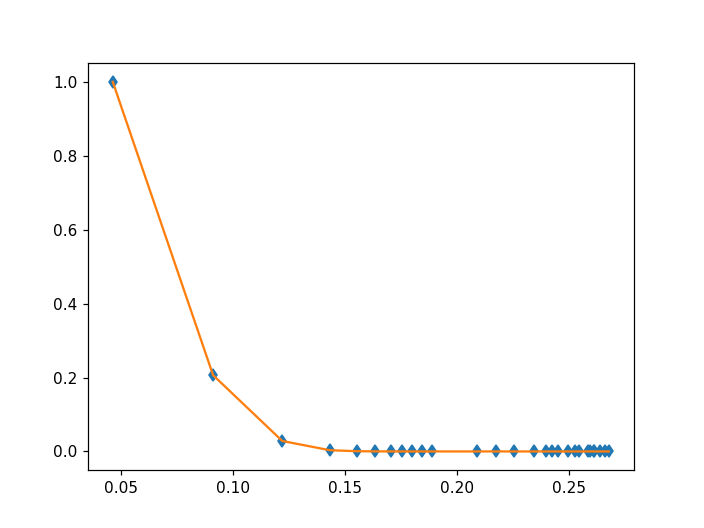

In [16]:
x = np.array([0.04632962, 0.09111097, 0.12199639, 0.14321615, 0.15542546,
       0.16332516, 0.17038888, 0.17540673, 0.18001615, 0.18429133,
       0.18885611, 0.20898624, 0.21740851, 0.22547927, 0.23441984,
       0.2397746 , 0.24227528, 0.24497761, 0.24973696, 0.25288743,
       0.25438593, 0.25866748, 0.25928191, 0.26101916, 0.2614255 ,
       0.2641146 , 0.26599499, 0.26782851])

y = np.array([1.00000000e+00, 2.06347596e-01, 2.86015974e-02, 3.44080697e-03,
       3.78811992e-04, 4.01823672e-05, 4.22767895e-06, 8.75699956e-07,
       2.25909945e-07, 9.29702603e-08, 4.78843402e-08, 4.30890890e-09,
       2.24556196e-09, 1.15668191e-09, 5.88461953e-10, 3.90989572e-10,
       2.87252126e-10, 2.25324512e-10, 1.53935363e-10, 1.13002462e-10,
       7.52166653e-11, 5.39328294e-11, 3.82279042e-11, 2.74129375e-11,
       1.88849995e-11, 1.09385754e-11, 4.79010078e-12, 0.00000000e+00])

y_fit = np.array([9.99837935e-01, 2.06364125e-01, 2.83358432e-02, 3.32273077e-03,
       6.20606239e-04, 1.66035956e-04, 4.22206431e-05, 1.40502198e-05,
       4.59652620e-06, 1.47226990e-06, 3.86689010e-07, 1.54492488e-10,
       1.67136552e-12, 8.35506184e-15, 5.81727670e-18, 3.11155200e-20,
       2.07320603e-21, 8.98376508e-23, 1.97058810e-25, 2.14766861e-27,
       2.16706480e-28, 1.75717739e-31, 5.87858142e-32, 2.38819787e-33,
       1.10261985e-33, 5.21906255e-36, 9.52439473e-38, 0.00000000e+00])

plt.figure()
plt.plot(x,y,'d')
plt.plot(x,y_fit,'-')

<IPython.core.display.Javascript object>


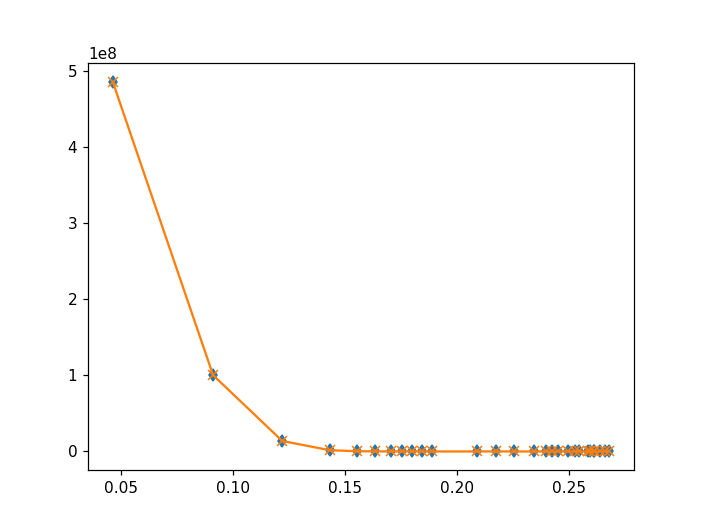

In [17]:
y_inv = np.array([4.85803232e+08, 1.00244329e+08, 1.38947485e+07, 1.67155517e+06,
       1.84028110e+05, 1.95207442e+04, 2.05384042e+03, 4.25438192e+02,
       1.09768104e+02, 4.51855752e+01, 2.32826895e+01, 2.11360411e+00,
       1.11122350e+00, 5.82242045e-01, 3.06198955e-01, 2.10266234e-01,
       1.59870247e-01, 1.29785612e-01, 9.51045326e-02, 7.52191971e-02,
       5.68627351e-02, 4.65229788e-02, 3.88934753e-02, 3.36395296e-02,
       2.94966297e-02, 2.56362312e-02, 2.26492824e-02, 2.03222359e-02])
y_fit_inv = np.array([4.8572451e+08, 1.0025236e+08, 1.3765644e+07, 1.6141934e+06,
       3.0149253e+05, 8.0660828e+04, 2.0510943e+04, 6.8256626e+03,
       2.2330276e+03, 7.1525378e+02, 1.8787509e+02, 9.5375180e-02,
       2.1134192e-02, 2.0326296e-02, 2.0322239e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02,
       2.0322235e-02, 2.0322235e-02, 2.0322235e-02, 2.0322235e-02])
plt.figure()
plt.plot(x,y_inv,'d')
plt.plot(x,y_fit_inv,'x-')